Total Actual Energy Production: 2539488.00 kWh
Total Theoretical Energy Production: 2644346.64 kWh


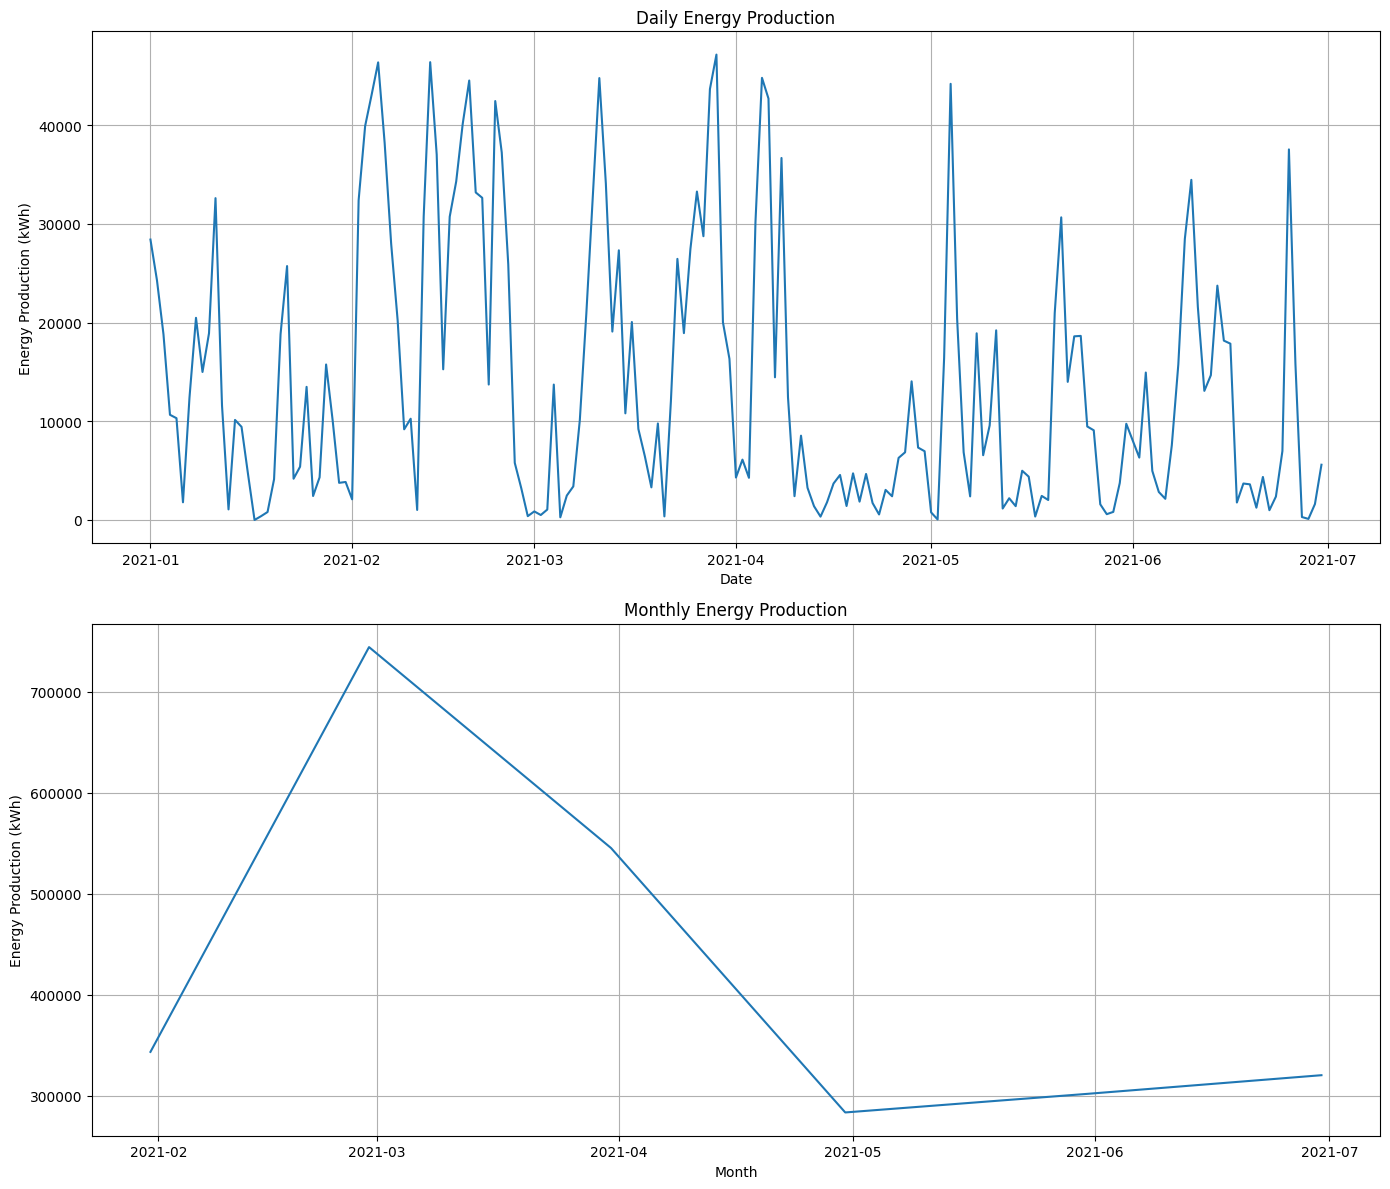

Days with unusually low production:
# Date and time
2021-01-17      0.000000
2021-01-18    382.000000
2021-01-19    804.000000
2021-02-28    385.823129
2021-03-01    865.510204
2021-03-02    500.555556
2021-03-05    266.777778
2021-03-21    361.347826
2021-04-14    337.526316
2021-04-23    557.000000
2021-05-01    766.123980
2021-05-02     51.354942
2021-05-17    345.900000
2021-05-28    585.250000
2021-05-29    816.477273
2021-06-22    987.586538
2021-06-27    296.565948
2021-06-28    105.913043
Name: Energy Export (kWh), dtype: float64

Days with unusually high production:
# Date and time
2021-02-03    39907.0
2021-02-04    43081.0
2021-02-05    46353.0
2021-02-06    38184.0
2021-02-13    46375.0
2021-02-14    37021.0
2021-02-18    40127.0
2021-02-19    44516.0
2021-02-23    42436.0
2021-02-24    37222.0
2021-03-11    44764.0
2021-03-28    43652.0
2021-03-29    47142.0
2021-04-05    44789.0
2021-04-06    42688.0
2021-04-08    36670.0
2021-05-04    44181.0
2021-06-25    37538.0
Name: 

In [3]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Load data from the uploaded files
turbine_data_file_path = '/home/herz/Desktop/wind/Turbine_Data_Penmanshiel_11_2021-01-01_-_2021-07-01_1051.csv'
status_data_file_path = '/home/herz/Desktop/wind/Status_Penmanshiel_11_2021-01-01_-_2021-07-01_1051.csv'

turbine_data = pd.read_csv(turbine_data_file_path, skiprows=9)
status_data = pd.read_csv(status_data_file_path, skiprows=9)

# Convert the 'Date and time' column to datetime for easier manipulation
turbine_data['# Date and time'] = pd.to_datetime(turbine_data['# Date and time'])
turbine_data.set_index('# Date and time', inplace=True)

# Calculate total energy production
total_actual_energy = turbine_data['Energy Export (kWh)'].dropna().sum()
total_theoretical_energy = turbine_data['Energy Theoretical (kWh)'].dropna().sum()

print(f"Total Actual Energy Production: {total_actual_energy:.2f} kWh")
print(f"Total Theoretical Energy Production: {total_theoretical_energy:.2f} kWh")

# Analyze daily and monthly energy production patterns
daily_production = turbine_data['Energy Export (kWh)'].resample('D').sum()
monthly_production = turbine_data['Energy Export (kWh)'].resample('ME').sum()

# Plot daily and monthly energy production
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 12))
ax1.plot(daily_production.index, daily_production)
ax1.set_title('Daily Energy Production')
ax1.set_xlabel('Date')
ax1.set_ylabel('Energy Production (kWh)')
ax1.grid(True)

ax2.plot(monthly_production.index, monthly_production)
ax2.set_title('Monthly Energy Production')
ax2.set_xlabel('Month')
ax2.set_ylabel('Energy Production (kWh)')
ax2.grid(True)

plt.tight_layout()
plt.show()


# Identify periods of low or high energy production
low_threshold = daily_production.quantile(0.10)
high_threshold = daily_production.quantile(0.90)

low_days = daily_production[daily_production < low_threshold]
high_days = daily_production[daily_production > high_threshold]

print("Days with unusually low production:")
print(low_days)
print("\nDays with unusually high production:")
print(high_days)

# Investigate reasons for low production days
daily_comparison = turbine_data.resample('D').agg({
    'Energy Export (kWh)': 'sum',
    'Energy Theoretical (kWh)': 'sum'
}).rename(columns={'Energy Export (kWh)': 'Actual Energy', 'Energy Theoretical (kWh)': 'Theoretical Energy'})

low_production_days = daily_comparison[daily_comparison['Actual Energy'] < daily_comparison['Theoretical Energy'] * 0.8]
